## License Information
---

This file is distributed as part of `swprocess`, a Python package for surface wave processing.

    Copyright (C) 2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _swprocess_ and this notebook
---

`swprocess` is a Python package for surface wave processing. `swprocess` was developed by
Joseph P. Vantassel under the supervision of Professor Brady R. Cox at The University of
Texas at Austin.

If you use _swprocess_ in your research or consulting, we ask you please cite the following:

__TBD__

<!-- >Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)
 _Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool on the `hvsrpy`
[archive](http://doi.org/10.5281/zenodo.3666956)._
 -->

<!-- The automated frequency-domain window-rejection algorithm and log-normal statistics
implemented in `hvsrpy` were developed by Tianjian Cheng under the supervision of
Professor Brady R. Cox at The University of Texas at Austin. To
recognize their original work please cite the follwing:

> Cox, B. R., Cheng, T., Vantassel, J. P., and Manuel, L. (2020). “A statistical
> representation and frequency-domain window-rejection algorithm for single-station
> HVSR measurements.” Geophysical Journal International, 221(3), 2170-2183.

This notebook also provides automatic checking of the SESAME (2004) reliability
and clarity critera. To recognize their original work please also cite the following:

> SESAME. (2004). Guidelines for the Implementation of the H/V Spectral Ratio Technique on Ambient Vibrations
> Measurements, Processing, and Interpretation. European Commission - Research General Directorate, 62,
> European Commission - Research General Directorate.
 -->
 
## Getting Started
---
1. Install _swprocess_ and its dependencies, with `pip install swprocess`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__ 

__TBD__

Happy Processing!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import swprocess
import swprepost

## Input
---

### Files

In [2]:
fname = "../masw/peaks_masw.json"
peaksuite = swprocess.PeaksSuite.from_jsons(fname)

### Plotting

In [3]:
# Domains to plot experimental dispersion.
domains = [
    ["frequency", "velocity"],
    ["wavelength", "velocity"],
]

# Bulk remove points outside of screening criteria.
limits = {
    "velocity" : [50, 1000]
}

# Plotting limits

### Array Resolution Limits

In [6]:
# kmin, kmax
# minimum_spacing

### Statistics

In [4]:
xdomain = "wavelength"
ydomain = "velocity"
xmin, xmax = 1, 100
nx = 30
xspace = "log"
missing_data_procedure = "ignore"
ignore = ["corr"]

## Plot Raw Data
---

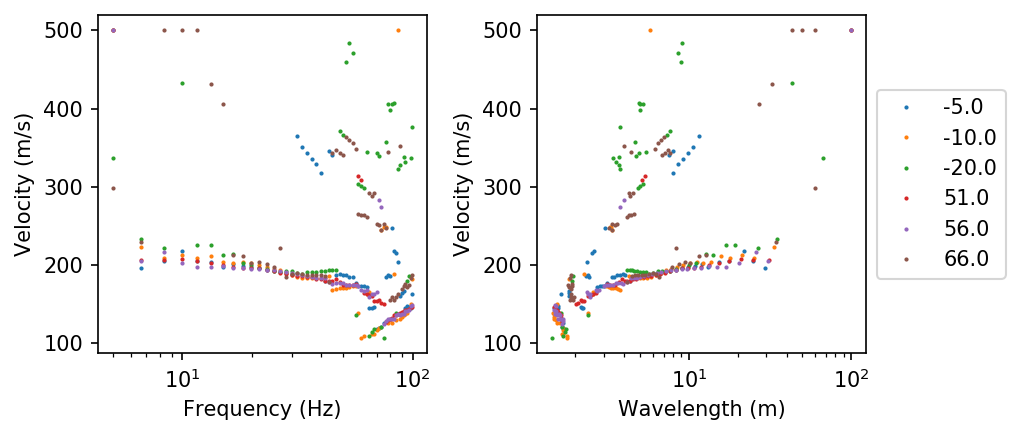

In [5]:
fig, axs = peaksuite.plot(xtype=[x for x, _ in domains], ytype=[y for _, y in domains])
axs[-1].legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

## Interactive Trimming
---

In [7]:
%matplotlib qt5
fname = "settings_post.json"
swprocess.PeaksSuite.create_setting_file(fname, domains=domains, xdomain=xdomain, ydomain=ydomain,
                                         xmin=xmin, xmax=xmax, nx=nx, xspace=xspace,
                                         stat_kwargs=dict(missing_data_procedure=missing_data_procedure, ignore=ignore),
                                         limits=limits)
peaksuite.interactive_trimming(fname)

Enter 1 to continue, 0 to quit, 2 to undo):  1
Enter 1 to continue, 0 to quit, 2 to undo):  1
Enter 1 to continue, 0 to quit, 2 to undo):  0


## Plot Data Post Trimming
---

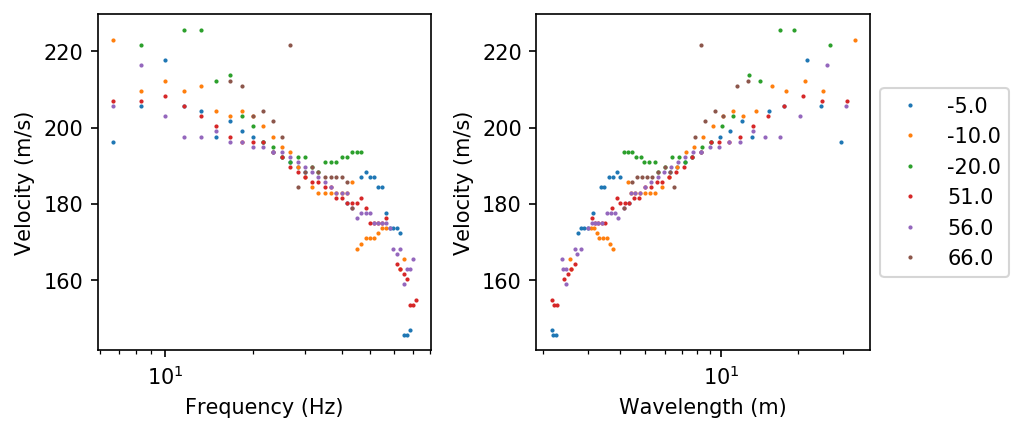

In [8]:
%matplotlib inline
fig, axs = peaksuite.plot(xtype=[x for x, _ in domains], ytype=[y for _, y in domains])
axs[-1].legend(loc="center left", bbox_to_anchor=(1,0.5))
plt.show()

## Plot Final Statistics
---

### TODO

- Number of points

d:\currentresearch\swprocess\swprocess\peakssuite.py:485: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(data_matrix, axis=1)
c:\users\joe\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


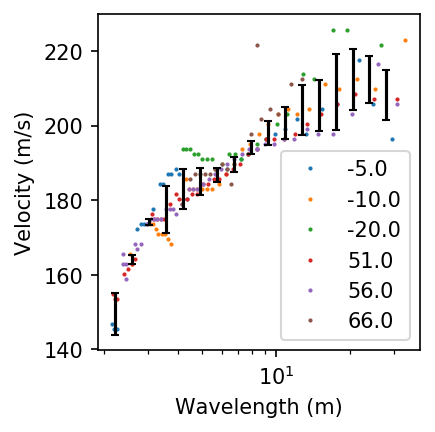

In [9]:
%matplotlib inline
stats = peaksuite.statistics(xx=np.geomspace(xmin, xmax, nx), xtype="wavelength", ytype="velocity", missing_data_procedure=missing_data_procedure, ignore=ignore)
xx, mean, stddev, corr = stats
fig, ax = peaksuite.plot(xtype="wavelength")
ax[0].errorbar(xx, mean, yerr=stddev, color="k", linestyle="", capsize=2, zorder=15)
plt.show()

## Write to `.json`
---

## Write to `.target`
---

In [10]:
frequency = mean/xx
velocity = mean
velstd = stddev

target = swprepost.Target(frequency[~np.isnan(frequency)], velocity[~np.isnan(velocity)], velstd=velstd[~np.isnan(velstd)])
target.to_target("masw", version="2")

IndexError: Size of error and curve must match exactly. 17 != 18.